## Import of libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras.backend as K
from keras.optimizers import adam
from keras.callbacks import Callback

from keras.utils import np_utils
from keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt

from keras import backend as K
K.common.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
import matplotlib as mpl
mpl.style.use('classic')

## Preparation of the data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [6]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


## Neural Network Model

### Creation of the model

In [7]:
input_shape = (32,32,3)

In [8]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

In [10]:
AdamOpt = adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

### ```CustomCallBack``` class for logging

In [11]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):
            print ("Just finished epoch", epoch)
            print ('Loss evaluated on the validation dataset =',
                 logs.get('val_loss'))
            print ('Accuracy reached train is', 
                 logs.get('accuracy'))
            print ('Accuracy reached Val   is', 
                 logs.get('val_accuracy'))
            return

### Training of the network

In [13]:
batch_size = 256
epochs = 50

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=0, 
                    validation_data=(x_test, y_test),
          callbacks = [CC])

Just finished epoch 0
Loss evaluated on the validation dataset = 1.4469786403656006
Accuracy reached train is 0.31814
Accuracy reached Val   is 0.47209998965263367
Just finished epoch 5
Loss evaluated on the validation dataset = 0.9087670278549195
Accuracy reached train is 0.63494
Accuracy reached Val   is 0.6775000095367432
Just finished epoch 10
Loss evaluated on the validation dataset = 0.7265240140914917
Accuracy reached train is 0.71222
Accuracy reached Val   is 0.7470999956130981
Just finished epoch 15
Loss evaluated on the validation dataset = 0.6470356616020203
Accuracy reached train is 0.74822
Accuracy reached Val   is 0.7781000137329102
Just finished epoch 20
Loss evaluated on the validation dataset = 0.6106726063728333
Accuracy reached train is 0.76568
Accuracy reached Val   is 0.7918999791145325
Just finished epoch 25
Loss evaluated on the validation dataset = 0.5932236465454102
Accuracy reached train is 0.78098
Accuracy reached Val   is 0.7997999787330627
Just finished epo

## Plots

Text(0, 0.5, 'Loss')

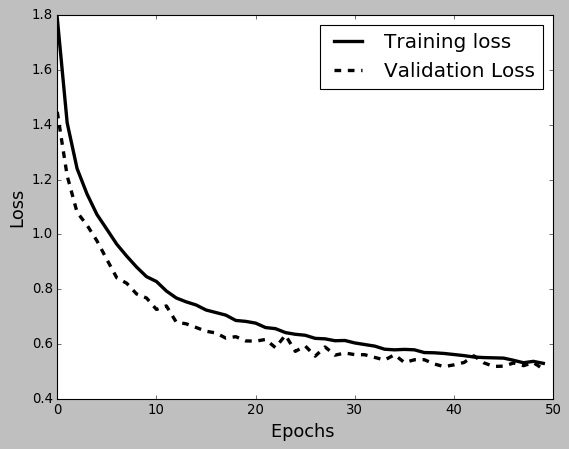

In [17]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('ch3-michelucci-figxx1.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

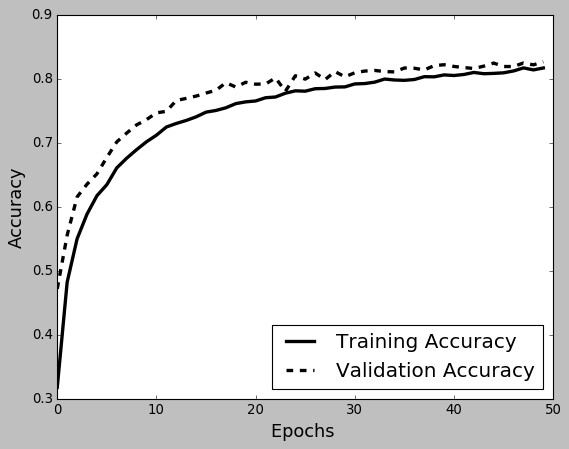

In [18]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('ch3-michelucci-figxx2.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')

In [23]:
history.history['val_accuracy'][-1]

0.8269000053405762

In [24]:
history.history['accuracy'][-1]

0.8172

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [28]:
model.save("savedmodels/model1.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
#To Import the model 
from keras.models import load_model
model = load_model('savedmodels/model1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 82.69%
